In [100]:
import gluoncv as gcv
import mxnet as mx
# mxnet NDarray 
from mxnet import nd

# MXNet Gluon Neural network layers.
from mxnet.gluon import nn

# optional for displaying the image
import ipyplot  # Need to remove this and quit using it
import matplotlib.pyplot as plt
import numpy as np
import os
import math
# pip install pillow but import PIL
from PIL import Image

# Loading images via  PIL and numpy

In [53]:
# setup file system locations
# yes, this should use os file path TODO: fix it
TOP_DIR='../'
print('TOP_DIR = ', TOP_DIR)
ICY_BRIDGE_DIR = TOP_DIR + 'icy-bridge/'
print('TOP_DIR = ', ICY_BRIDGE_DIR)
MODEL_NAME = 'c6'
MODEL_TOP_DIR = ICY_BRIDGE_DIR + MODEL_NAME + '/'
print('MODEL_TOP_DIR = ', MODEL_TOP_DIR)
MODEL_RAW_IMAGE_DIR = MODEL_TOP_DIR + 'raw/'
MODEL_POST_IMAGE_DIR = MODEL_TOP_DIR + 'post_rotate_crop/'
print('MODEL_RAW_IMAGE_DIR = ', MODEL_RAW_IMAGE_DIR)
print('MODEL_POST_IMAGE_DIR = ', MODEL_POST_IMAGE_DIR)

TOP_DIR =  ../
TOP_DIR =  ../icy-bridge/
MODEL_TOP_DIR =  ../icy-bridge/c6/
MODEL_RAW_IMAGE_DIR =  ../icy-bridge/c6/raw/
MODEL_POST_IMAGE_DIR =  ../icy-bridge/c6/post_rotate_crop/


In [54]:
# test to make sure directory is correct
my_limit = 3
for a_obj_name in os.listdir(MODEL_RAW_IMAGE_DIR):
    my_limit = my_limit - 1
    if my_limit < 0:
        break
    print(a_obj_name)


BUS40_SALEM_20220115Z1655.jpg
BUS40_SALEM_20220117Z0940.jpg
BUS40_SALEM_20220114Z1255.jpg


In [55]:
# load an image using numpy and display it.
def show_it(an_nparray, viewit=False):
    if viewit:
        print("array is ", an_nparray)
    print("shape is ", an_nparray.shape)
    print("dtype is ", an_nparray.dtype)
    print("ndim is ", an_nparray.ndim)
    print("itemsize is ", an_nparray.itemsize) # size in bytes of each array element
    print("nbytes is ", an_nparray.nbytes) # size in bytes of each array element
    if viewit:
        print("view is ", an_nparray.view)
    #print("order is ", an_array.order)
    #print("type is ", img_filename_array.type)
    #print("descr is ", img_filename_array.descr)
    if viewit:
        ipyplot.plot_images(an_nparray)

array is  ['imgs/stimpyG.png']
shape is  (1,)
dtype is  <U16
ndim is  1
itemsize is  64
nbytes is  64
view is  <built-in method view of numpy.ndarray object at 0x7f9588616240>


imgs/stimpyG.png
PNG (3024, 4032) L
shape is  (4032, 3024)
dtype is  uint8
ndim is  2
itemsize is  1
nbytes is  12192768


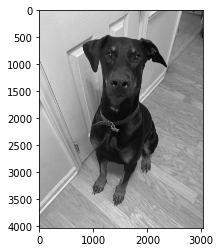

In [56]:
# a grayscale png
stimpyG_filepath = 'imgs/stimpyG.png'
stimpyG_nparray = np.array([stimpyG_filepath])
# array(['imgs/stimpyG.png'], dtype='<U16')
show_it(stimpyG_nparray, True)
# show it says this is a scalar.  Its just a filename.
# The filename is passed to ipyplot and it dumps the image 
# by reading the filename
print(stimpyG_nparray[0]) # there is not index 1
# you can also tell if you try to plot it as an array
# It will fail
#plt.imshow(stimpyG_nparray, cmap='gray')

# you can 
png_pil_img = Image.open(stimpyG_filepath)
print(png_pil_img.format, png_pil_img.size, png_pil_img.mode)
png_np_img = np.asarray(png_pil_img)
plt.imshow(png_np_img, cmap='gray')
show_it(png_np_img)

show the jpeg as an array
array is  ['../icy-bridge/c6/raw/BUS40_SALEM_20220114Z1255.jpg']
shape is  (1,)
dtype is  <U50
ndim is  1
itemsize is  200
nbytes is  200
view is  <built-in method view of numpy.ndarray object at 0x7f9588599ad8>


JPEG (704, 480) RGB
shape is  (480, 704, 3)
dtype is  uint8
ndim is  3
itemsize is  1
nbytes is  1013760


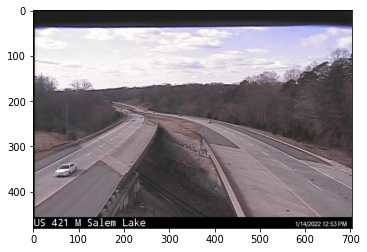

In [57]:
# a color jpeg
jpegC_filepath = MODEL_RAW_IMAGE_DIR + 'BUS40_SALEM_20220114Z1255.jpg'
# This is a jpeg. Its compressed images
jpegC_nparray = np.array([jpegC_filepath])
print("show the jpeg as an array")
show_it(jpegC_nparray, True)
# this doesn't work because its not a bitmap.

# you can work around it using python image library to perfrom decompression

jpegC_pil_img = Image.open(jpegC_filepath)
# this will show its JPEG 704x480 and RGB (color)
print(jpegC_pil_img.format, jpegC_pil_img.size, jpegC_pil_img.mode)
# sadly this does not work on my box since it has this bug
# https://github.com/python-pillow/Pillow/issues/5945
# jpegC_pil_img.sho

# convert to nparray
jpegC_np_img = np.asarray(jpegC_pil_img)
# note this will fail with ipyplot
#show_it(jpegC_np_img)
# But if I try to print it using just the array, which it is now it will
plt.imshow(jpegC_np_img)
show_it(jpegC_np_img)


All of this is immaterial because I want to use mxnet to do my transforms, but it helps to have example code
around if I suspect something is wrong.  I can use alternative means to manipulate it.

# Loading images via Apache MXNet

In [65]:
def show_it_mxnet(a_mxnet_image):
    plt.imshow(a_mxnet_image.asnumpy())
    print("type: ", type(a_mxnet_image))
    print("shape: ", a_mxnet_image.shape)


type:  <class 'mxnet.ndarray.ndarray.NDArray'>
shape:  (480, 704, 3)


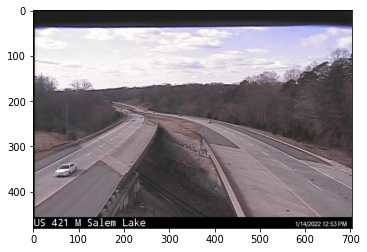

In [66]:
# a color jpeg
jpegC_filepath = MODEL_RAW_IMAGE_DIR + 'BUS40_SALEM_20220114Z1255.jpg'

jpeg_30255 = mx.image.imread(jpegC_filepath, flag=1) # flag=1 for color flag=0 for grayscale
show_it_mxnet(jpeg_30255)

type:  <class 'mxnet.ndarray.ndarray.NDArray'>
shape:  (480, 704, 3)


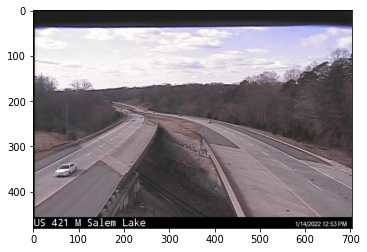

In [67]:
# convert to float - matplotlib can print floats but only [0--1]
jpeg_30255f = jpeg_30255.astype('float32')
jpeg_301f = jpeg_30255f/255
show_it_mxnet(jpeg_301f)


# convert to grayscale

In [86]:
# grayscale augmentation
# https://mxnet.apache.org/versions/1.6/api/python/docs/api/mxnet/image/index.html#mxnet.image.RandomGrayAug

# general getting started tutorials
# https://mxnet.apache.org/versions/1.6/api/python/docs/tutorials/getting-started/index.html

# how to use image augmentation
# https://mxnet.apache.org/versions/1.2.1/tutorials/python/types_of_data_augmentation.html


In [87]:
!wget https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/doc/tutorials/data_aug/inputs/0.jpg

--2022-02-13 21:30:31--  https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/doc/tutorials/data_aug/inputs/0.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194713 (190K) [image/jpeg]
Saving to: ‘0.jpg.1’

0.jpg.1             100%[===================>] 190.15K  --.-KB/s    in 0.04s   

2022-02-13 21:30:31 (5.05 MB/s) - ‘0.jpg.1’ saved [194713/194713]



In [88]:
def plot_mx_array(array):
    """
    Array expected to be height x width x 3 (channels), and values are floats between 0 and 255.
    """
    assert array.shape[2] == 3, "RGB Channel should be last"
    plt.imshow((array.clip(0, 255)/255).asnumpy())

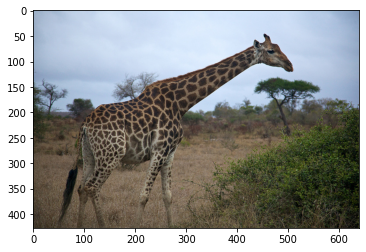

In [89]:
example_image = mx.image.imread("./0.jpg")
example_image = example_image.astype("float32")    
plot_mx_array(example_image)

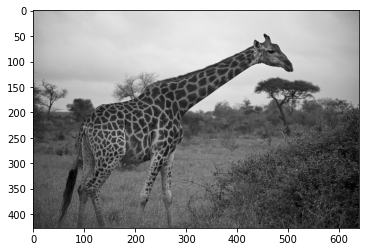

In [90]:
example_image_copy = example_image.copy()
aug = mx.image.RandomGrayAug(p=1)
aug_image = aug(example_image_copy)
plot_mx_array(aug_image)

type:  <class 'mxnet.ndarray.ndarray.NDArray'>
shape:  (480, 704, 3)


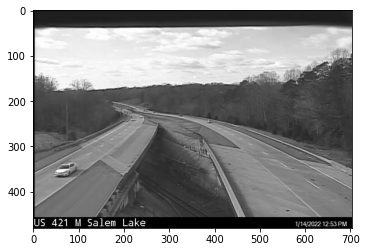

In [85]:
aug = mx.image.RandomGrayAug(p=1)
jpeg_101f = aug(jpeg_301f)
show_it_mxnet(jpeg_101f)

# Rotate

From this source

https://en.wikipedia.org/wiki/Rotation_matrix


\begin{vmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{vmatrix}


rotates points in the xy plane counterclockwise through an angle θ with respect to the positive x axis about the origin of a two-dimensional Cartesian coordinate system. To perform the rotation on a plane point with standard coordinates v = (x, y), it should be written as a column vector, and multiplied by the matrix R:


\begin{align}
\begin{vmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{vmatrix}
\begin{vmatrix} x \\ y \end{vmatrix} = 
\begin{vmatrix}
x \cos(\theta) - y \sin(\theta) \\
x \sin(\theta) + y \cos(\theta)
\end{vmatrix}
\end{align}


In [94]:
numpy_ex_int_array = np.array([
                                  [[1,2]],
                                  [[4,5]]
                              ], dtype=np.int32)

In [95]:
numpy_ex_int_array

array([[[1, 2]],

       [[4, 5]]], dtype=int32)

In [97]:
mx_ex_int_array = mx.nd.array(numpy_ex_int_array)
mx_ex_int_array


[[[1. 2.]]

 [[4. 5.]]]
<NDArray 2x1x2 @cpu(0)>

In [105]:
def build_rot_matrix(angle):
    #  a  b
    #  c  d
    
    # calculate terms
    a = math.cos(x)
    b = -math.sin(x)
    c = math.sin(x)
    d = math.cos(x)

    # print("a = ", a)
    # print("b = ", b)
    # print("c = ", c)
    # print("d = ", d)
    
    # build np array
    np_array = np.array([
        [[a,b]],
        [[c,d]]
    ])
    
    # build mx.nd array
    nd_array = mx.nd.array(np_array)
    
    return nd_array

In [108]:
x=0.5*math.pi

rotate_90 = build_rot_matrix(x)

In [116]:
# create a weight constant
#w = mx.init.Constant(rotate_90)
# create a nn. You need to do this.  Calling the layer.initialize() function below
# will not update the filter without it?
#layer = nn.Conv2D(channels=1, kernel_size=(3,3), in_channels=1, strides=(1,1), padding=(0,0), activation='relu', prefix='conv_')

# init layer with this constant
#layer.initialize(w)

image_HWC1 = mx.image.imread('imgs/testy-grid.png', 0)
image_HWC1 = mx.image.imread('imgs/stimpyG.png', 0)
image_HWC1f = image_HWC1.astype('float32')


# So that its channel first. 
#image_CHWf = jpeg_101f.transpose((2,0,1))
#image_CHWf = image_HWC1f.transpose((2,0,1))
# Convert 3D to 4D with leading batch channel.  
#image_NCHWf = image_CHWf.expand_dims(axis=0)
# Now its in NCHW format
#output = layer(image_NCHWf)
# output is a 4D tensor in NCHW format
# Use squeeze to remove any 1-D dimension
#result_numpy_HWC = output.squeeze().asnumpy()
# show result
#plt.imshow(result_numpy_HWC, cmap='gray')

In [115]:
jpeg_101f.shape

(480, 704, 3)

In [ ]:
image_H